# Neural network loss function surface visualization

[Materials](https://jithinjk.github.io/blog/nn_loss_visualized.md.html)

![](https://losslandscape.com/wp-content/uploads/2020/06/loss-landscape-visualization-infographic-x2000.jpg)

In this task we consider a way to visualize loss function. For visualization your actions are following:

Choose a point $\theta^*$ and two random directions $v_1$ and $v_2$. Then, plot function $f(\alpha, \beta) = L(\theta^* + \alpha v_1 + \beta v_2)$.

## Neural network defining and training

### Import TensorFlow

In [ ]:
import tensorflow as tf
import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 4s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


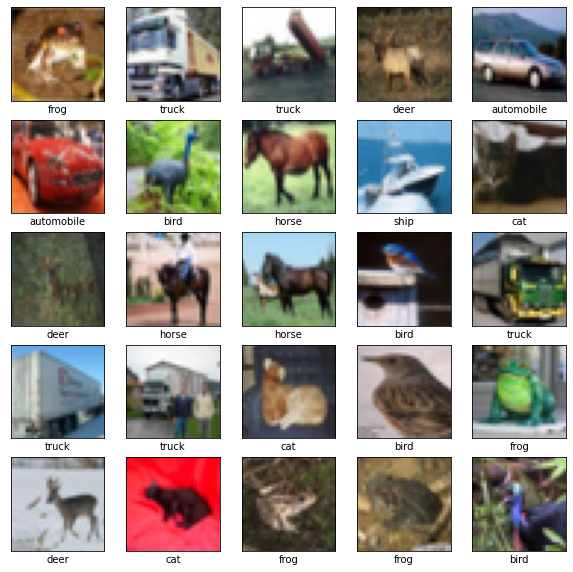

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                73760     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 40s 7ms/step - loss: 1.5036 - accuracy: 0.4585 - val_loss: 1.2241 - val_accuracy: 0.5669
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1185 - accuracy: 0.6084 - val_loss: 1.0970 - val_accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9923 - accuracy: 0.6541 - val_loss: 0.9908 - val_accuracy: 0.6578
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9088 - accuracy: 0.6850 - val_loss: 0.9421 - val_accuracy: 0.6715
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8457 - accuracy: 0.7065 - val_loss: 0.9276 - val_accuracy: 0.6889
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7949 - accuracy: 0.7244 - val_loss: 1.0172 - val_accuracy: 0.6569
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7532 - accuracy: 0.7398 - val_loss: 0.8956 - val_ac

### Evaluate the model

313/313 - 1s - loss: 0.9125 - accuracy: 0.6988


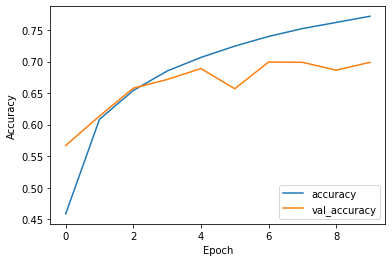

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Save model weights and generate directions

In [ ]:
model.save("trained_model")

INFO:tensorflow:Assets written to: trained_model/assets


## One dimensional projection

In [ ]:
def generate_random_direction(model):
    list_of_weights = []
    for weight in model.get_weights():
        list_of_weights.append(weight*(1 + 1e-1*np.random.randn(*weight.shape)))
    return list_of_weights

  0%|          | 0/24 [00:00<?, ?it/s]

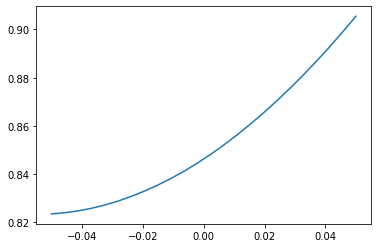

In [ ]:
alphas  = np.linspace(-5e-2, 5e-2, 24)
v_1     = generate_random_direction(model)
losses  = []

for alpha in tqdm(alphas):

    model       = keras.models.load_model('trained_model')
    new_weights = []
    for weight, v_1_weight in zip(model.get_weights(), v_1):
        new_weight = weight + alpha*v_1_weight
        new_weights.append(new_weight)

    model.set_weights(new_weights)
    
    test_loss, test_acc = model.evaluate(test_images[:100],  test_labels[:100], verbose = 0)
    losses.append(test_loss)

plt.plot(alphas, losses)

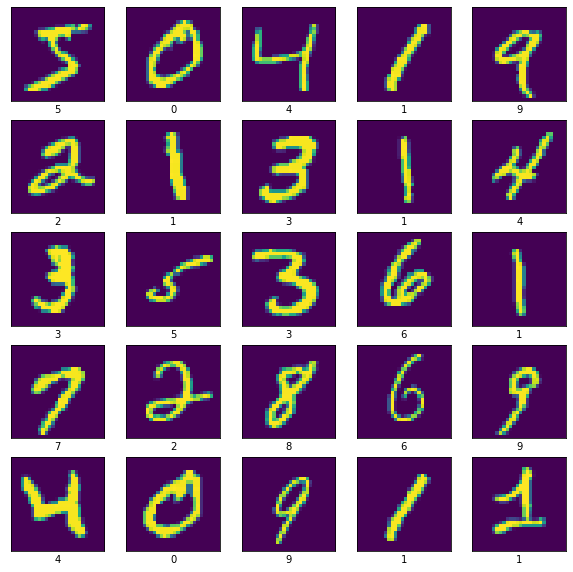

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3552 - accuracy: 0.8988 - val_loss: 0.2372 - val_accuracy: 0.9298
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2092 - accuracy: 0.9400 - val_loss: 0.1817 - val_accuracy: 0.9462
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1633 - accuracy: 0.9526 - val_loss: 0.1492 - val_accuracy: 0.9571
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1336 - accuracy: 0.9610 - val_loss: 0.1359 - val_accuracy: 0.9590
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1146 - accuracy: 0.9664 - val_loss: 0.1247 - val_accuracy: 0.9632
INFO:tensorflow:Assets written to: trained_model/assets


## Surface plot

11501568/11490434 [==============================] - 0s 0us/step


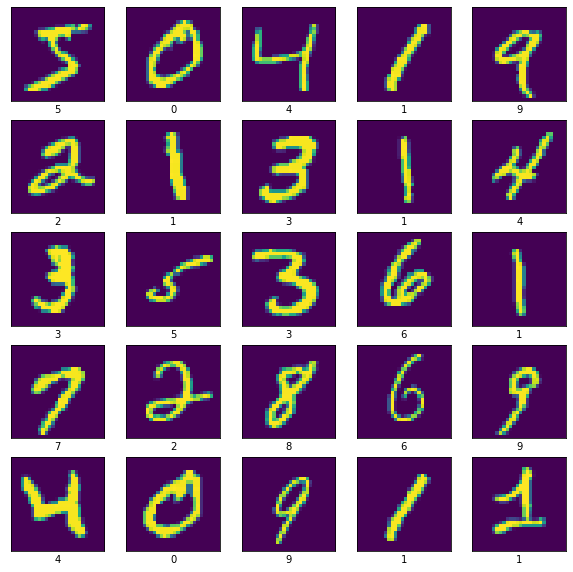

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3567 - accuracy: 0.9004 - val_loss: 0.2351 - val_accuracy: 0.9340
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2104 - accuracy: 0.9406 - val_loss: 0.1804 - val_accuracy: 0.9476
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1641 - accuracy: 0.9519 - val_loss: 0.1595 - val_accuracy: 0.9525
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1363 - accuracy: 0.9603 - val_loss: 0.1401 - val_accuracy: 0.9560
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1188 - accuracy: 0.9653 - val_loss: 0.1274 - val_accuracy: 0.9621
INFO:tensorflow:Assets written to: trained_model/assets


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


class_names = [str(i) for i in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()


train_images    = train_images.reshape(60000,28,28,1)
test_images     = test_images.reshape(10000,28,28,1)
model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation = 'selu'))



# model.add(layers.Flatten())
# model.add(layers.Dense(, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

model.save("trained_model")

In [ ]:
def generate_random_direction(model):
    list_of_weights = []
    for weight in model.get_weights():
        list_of_weights.append(weight*(1 + np.random.randn(*weight.shape)))
    return list_of_weights


bound = 1
alphas  = np.linspace(-bound, bound, 25)
betas   = np.linspace(-bound, bound, 25)
v_1     = generate_random_direction(model)
v_2     = generate_random_direction(model)
losses  = np.zeros((len(alphas), len(betas)))

for i_alpha, alpha in tqdm(enumerate(alphas)):
    for i_beta, beta in tqdm(enumerate(betas), leave=False):
        model       = keras.models.load_model('trained_model')
        new_weights = []
        for weight, v_1_weight, v_2_weight in zip(model.get_weights(), v_1, v_2):
            new_weight = weight + alpha*v_1_weight + beta*v_2_weight
            new_weights.append(new_weight)

        model.set_weights(new_weights)
        
        test_loss, test_acc = model.evaluate(test_images[:50],  test_labels[:50], verbose = 0)
        losses[i_alpha, i_beta] = test_loss

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
z_data = losses
z = losses
sh_0, sh_1 = z.shape
x, y = alphas, betas
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='2d Loss surface approximation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()